<a href="https://colab.research.google.com/github/skreddypalvai/7MlWQpaQ38udIkNh---Apziva-Project/blob/main/Termdeposit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Term Deposit Marketing**

In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_score, classification_report, accuracy_score,roc_auc_score,roc_curve

In [ ]:
#loading the dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/term-deposit-marketing-2020.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [ ]:
print(f"There are total {df.shape[0]} rows and {df.shape[1]} columns.")

There are total 40000 rows and 14 columns.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


We can notice there are no null values in the entire dataset.

In [ ]:
df['y'].value_counts()

no     37104
yes     2896
Name: y, dtype: int64

We can observe a significant imbalance in the target class. Only 7.5% of customers are subscribed to the term deposit in the entire dataset.

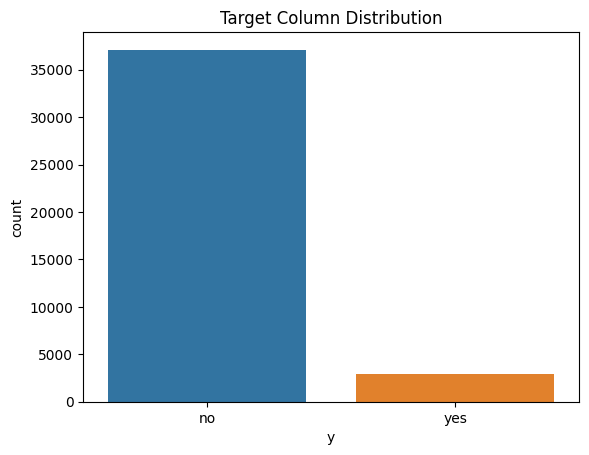

In [ ]:
#target class distribution
sns.countplot(x='y', data=df)
plt.title('Target Column Distribution')
plt.show()

  Heavy Imbalance

In [ ]:
# fixing the datatypes
#list of category columns that are not object type
cat_cols = ['job', 'education', 'contact', 'month', 'marital','loan','housing','default']
df[cat_cols] = df[cat_cols].astype("category")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        40000 non-null  int64   
 1   job        40000 non-null  category
 2   marital    40000 non-null  category
 3   education  40000 non-null  category
 4   default    40000 non-null  category
 5   balance    40000 non-null  int64   
 6   housing    40000 non-null  category
 7   loan       40000 non-null  category
 8   contact    40000 non-null  category
 9   day        40000 non-null  int64   
 10  month      40000 non-null  category
 11  duration   40000 non-null  int64   
 12  campaign   40000 non-null  int64   
 13  y          40000 non-null  object  
dtypes: category(8), int64(5), object(1)
memory usage: 2.1+ MB


We can observe that excluding the target class all the object type are corrected as category type

Performing cross tabulation for each categorical feature:

In [ ]:
# Creating a list of categorical columns
cat_cols = df.select_dtypes(["category"])
# Getting the value counts for each feature by target class
for i in cat_cols.columns:
    crosstab_result = pd.crosstab(cat_cols[i], df['y'])
    print(f"Cross-tabulation for feature: {i}\n")
    print(crosstab_result)
    print("-" * 174)
    print("\n")

Cross-tabulation for feature: job

y                no  yes
job                     
admin          4132  351
blue-collar    8848  535
entrepreneur   1317   88
housemaid      1034   53
management     7490  676
retired        1286  151
self-employed  1302  112
services       3672  238
student         442   82
technician     6355  497
unemployed     1008   96
unknown         218   17
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Cross-tabulation for feature: marital

y            no   yes
marital              
divorced   4334   391
married   22908  1478
single     9862  1027
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Cross-tabulation for feature: education

y             no   yes
education             
primary     5917   353
se

In [ ]:
# transforming the target class vlaues to binary values
df['y'] = df['y'].apply(lambda val: 1 if str(val).lower() == 'yes' else 0)
df['y'].value_counts()

0    37104
1     2896
Name: y, dtype: int64

####  Proportional distributions of categorical features:

<Figure size 1500x1500 with 0 Axes>

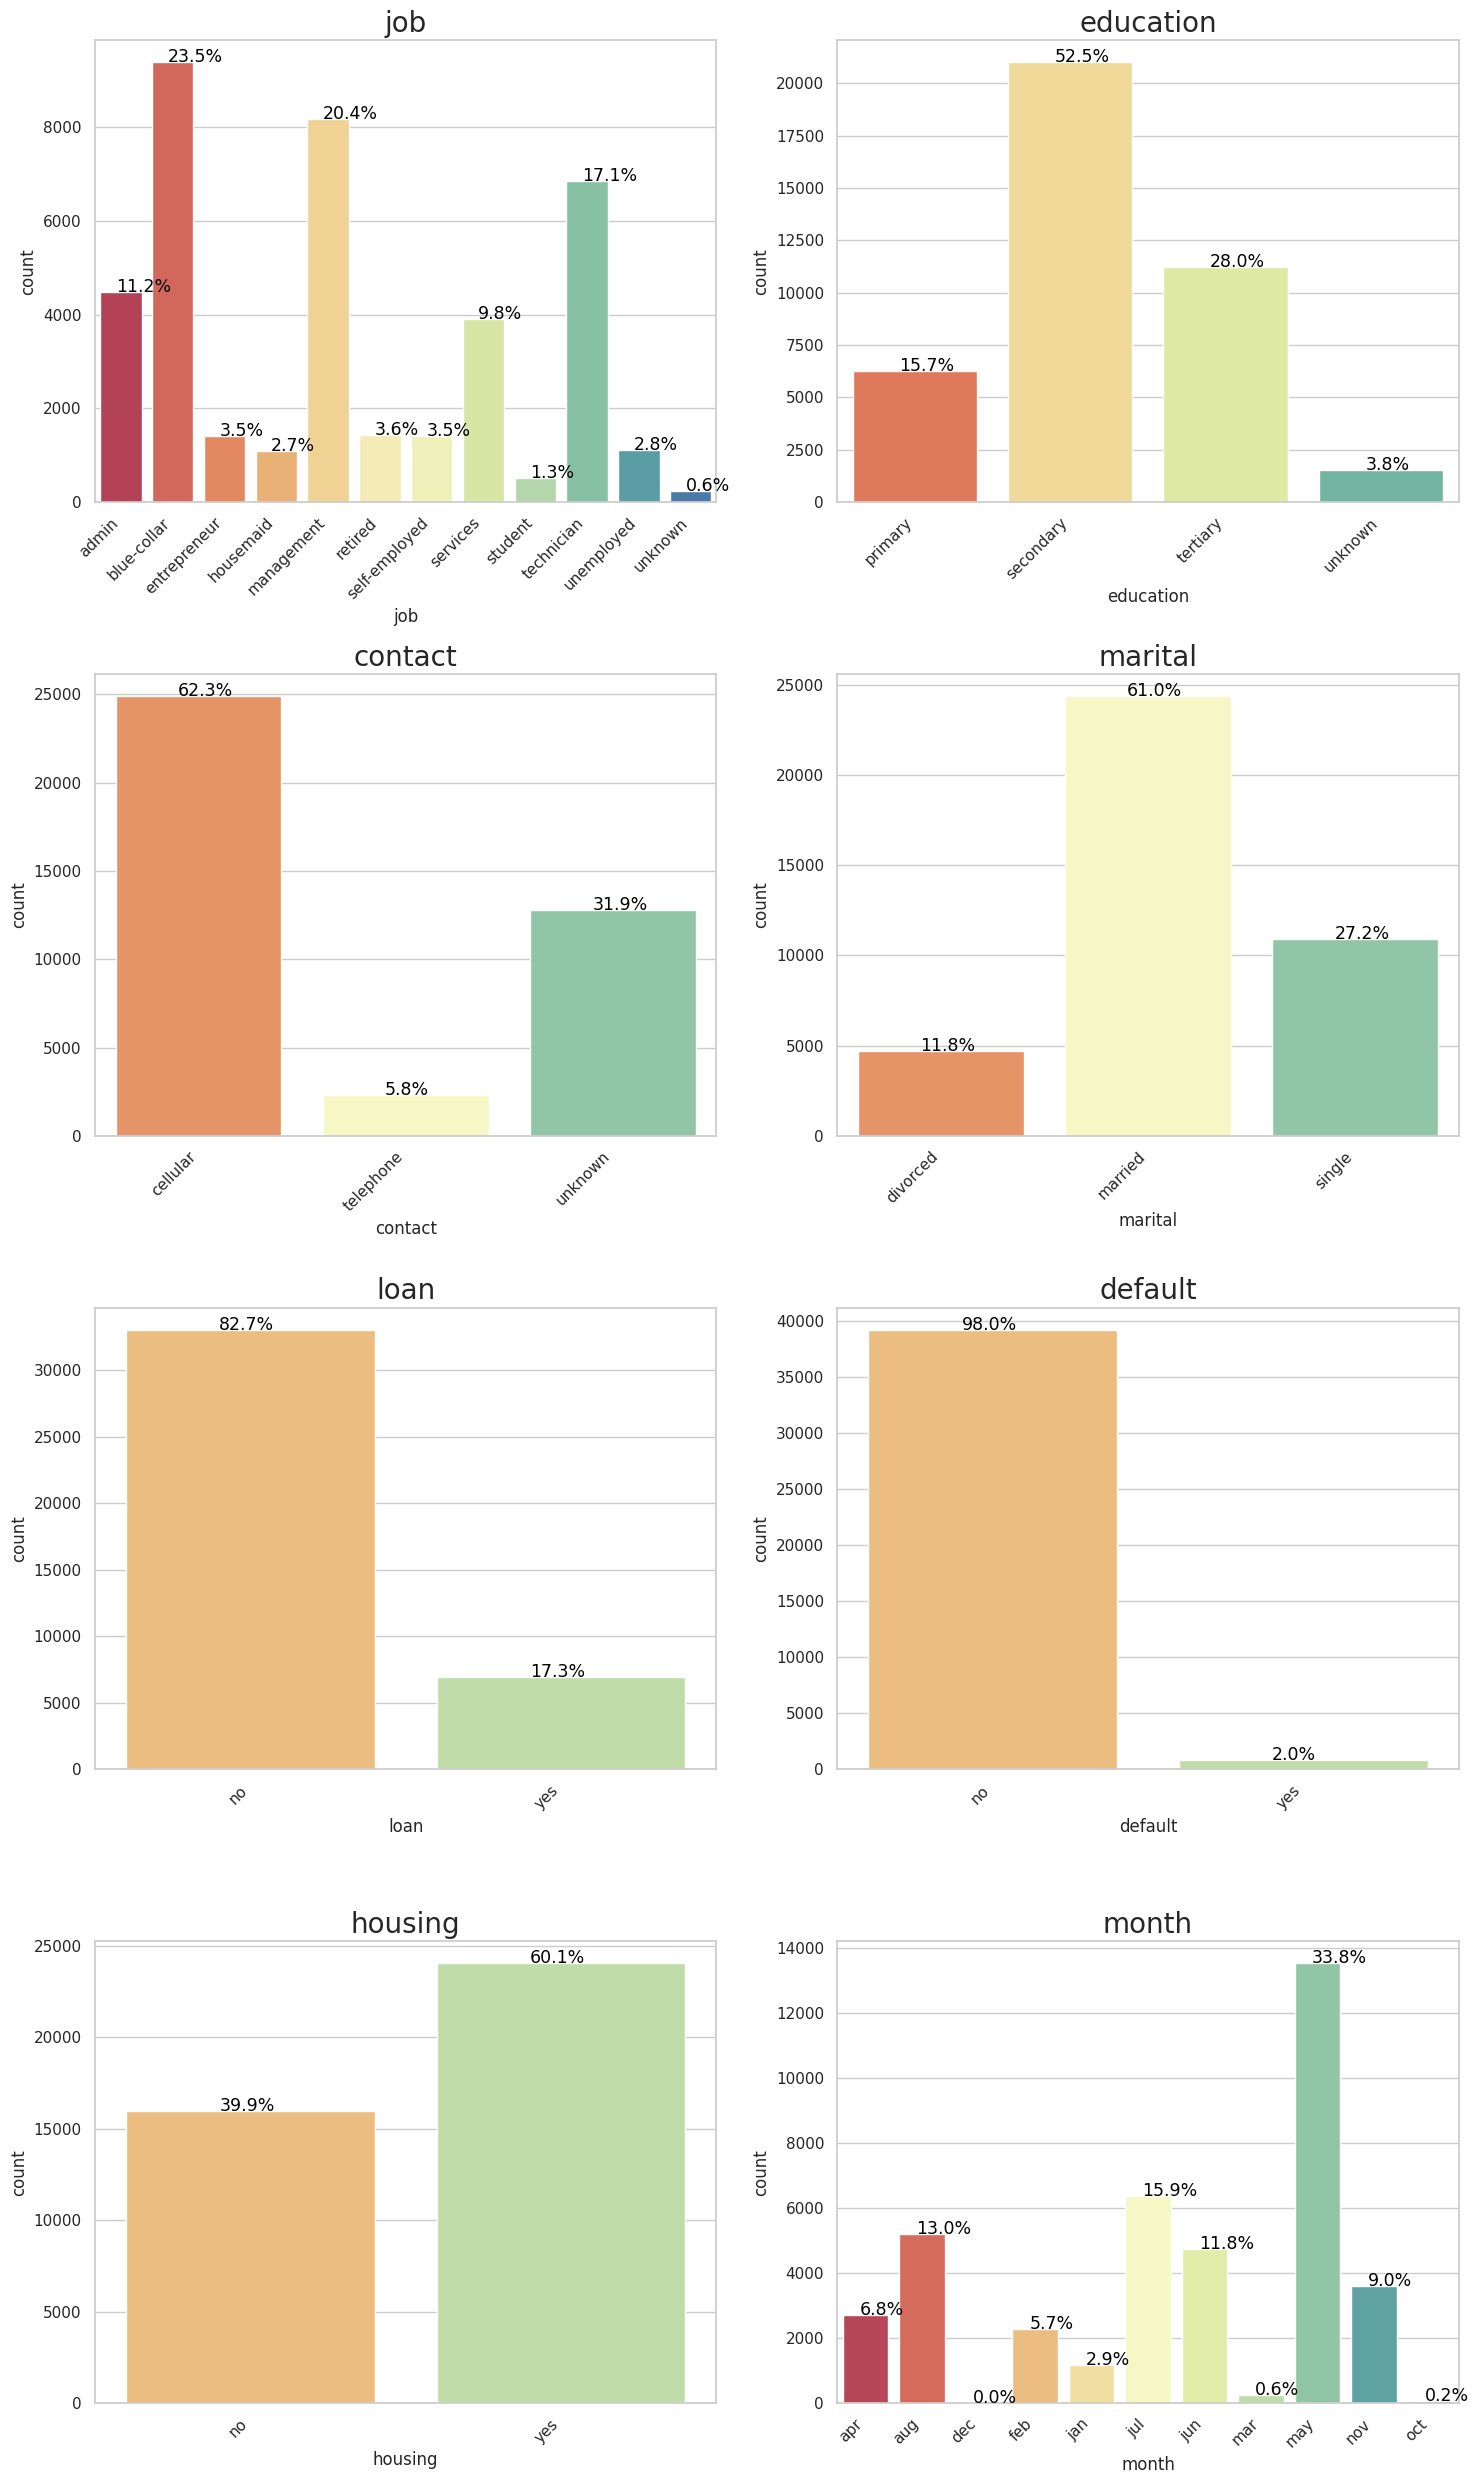

In [ ]:
sns.set(style="whitegrid")
# Categorical features to visualize
features = ['job', 'education', 'contact', 'marital', 'loan', 'default', 'housing','month']
plt.figure(figsize=(15, 15))
num_categories = len(features)
# Creating subplots using plt.subplots() for better layout control
fig, axes = plt.subplots(4, 2, figsize=(15, 5 * 5))
for i, col in enumerate(features):
    ax = axes[i // 2, i % 2]
    sns.countplot(data=df, x=col, palette='Spectral', ax=ax)
    ax.set_title(col, fontsize=20)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    total = len(df[col])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + (p.get_width() / 2) - 0.1
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size=12.5, color='black')
#displaying
plt.tight_layout()
plt.show()

####  visualizing the categorical features by the target class:

<Figure size 1500x1500 with 0 Axes>

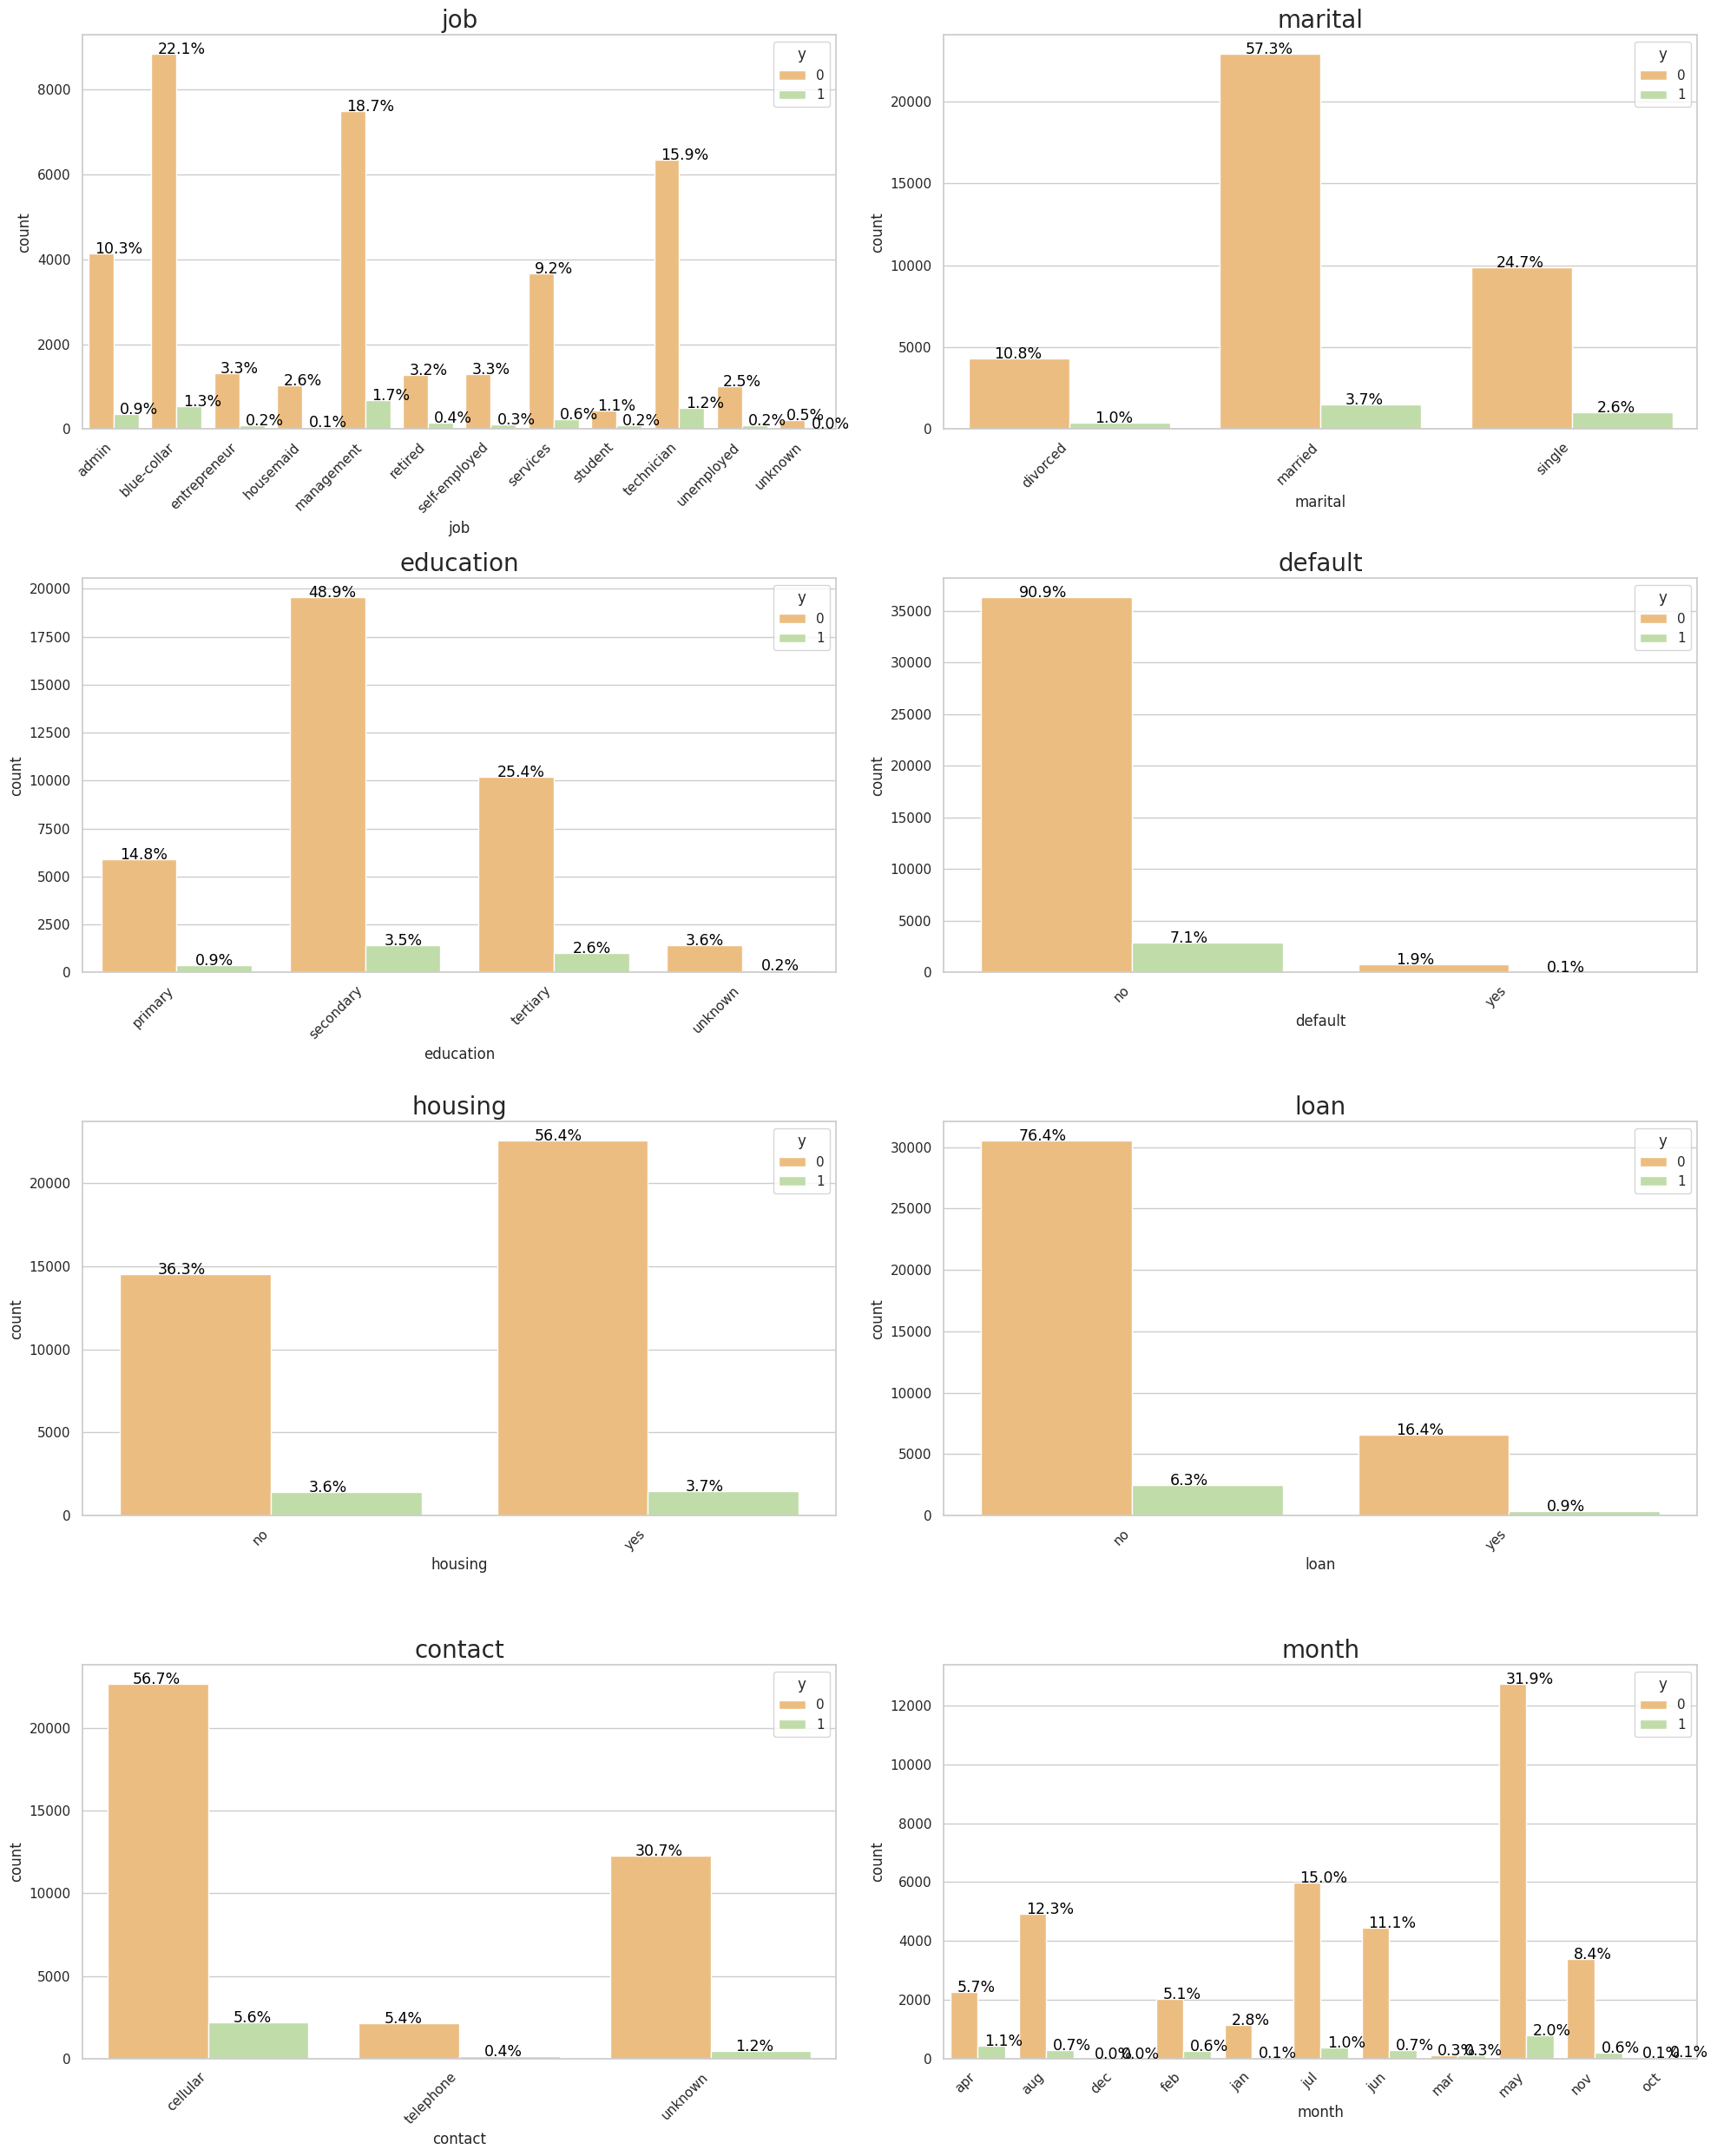

In [ ]:
plt.figure(figsize=(15, 15))
categorical_val = [ 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','month']
num_categories = len(categorical_val)
# Creating subplots using plt.subplots() for better layout control
fig, axes = plt.subplots(4, 2, figsize=(20, 5*5))  # 4 rows, 2 columns
for i, col in enumerate(categorical_val):
    ax = axes[i // 2, i % 2]  # Calculate the row and column index
    sns.countplot(data=df, x=col, hue='y',palette='Spectral', ax=ax)
    ax.set_title(col, fontsize=20)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

    total = len(df[col])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + (p.get_width() / 2) - 0.1
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size=12.5, color='black')

# Displaying
plt.tight_layout()
plt.show()

From the figures above, it is evident that a large number of individuals from various categories in the given features did not choose the term deposit plan compared to those who did choose it.

In [ ]:
# selecting numerical datatypes
Uni_num = df.select_dtypes(include=np.number).columns.tolist()

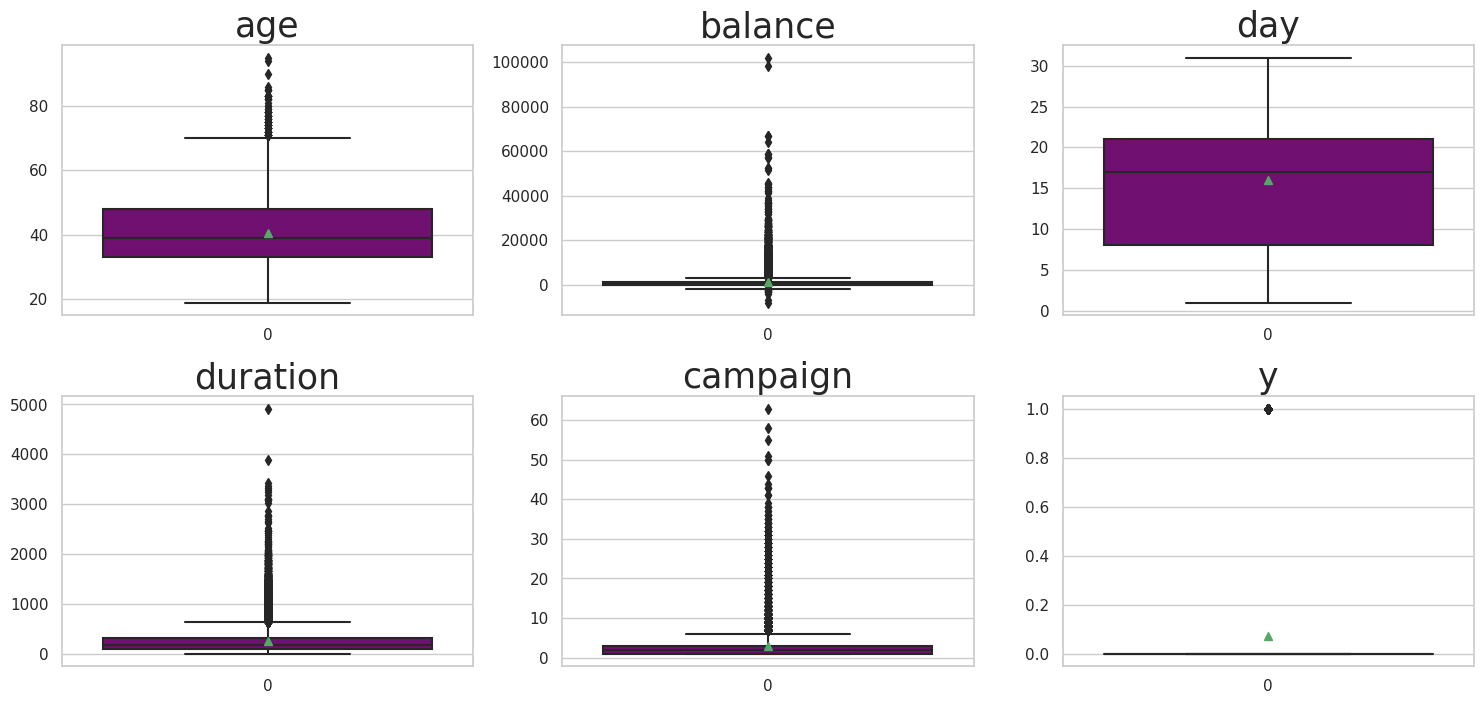

In [ ]:
# detecting outliers for the numerical features using box plots
plt.figure(figsize=(15,35))
for i in range(len(Uni_num)):
    plt.subplot(10,3,i+1)
    sns.boxplot(df[Uni_num[i]],showmeans=True, color='purple')
    plt.tight_layout()
    plt.title(Uni_num[i],fontsize=25)

plt.show()

We can observe that Age, Balance, Duration, and Campaign have a notable number of outliers. Among these four features, only Duration and Campaign contains a significant presence of outliers.

In [ ]:
#calculating the no of outliers in the respective columns
def detect_outliers_zscore(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    z_scores = (data - mean) / std_dev
    threshold = 3
    # Identify outliers based on the Z-score threshold
    outliers = np.where(np.abs(z_scores) > threshold)[0]
    return outliers
columns_Outlier = ['age','balance','duration','campaign']
for column in columns_Outlier:
    feature_data = df[column]
    # Detect outliers using Z-score
    outliers_indices = detect_outliers_zscore(feature_data)
    if len(outliers_indices) > 0:
        print(f"Outliers detected in '{column}' at indices:", len(outliers_indices))
    else:
        print(f"No outliers detected in '{column}'.")

Outliers detected in 'age' at indices: 89
Outliers detected in 'balance' at indices: 674
Outliers detected in 'duration' at indices: 865
Outliers detected in 'campaign' at indices: 836


<ipython-input-16-d0692deb14df>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr= df.corr()


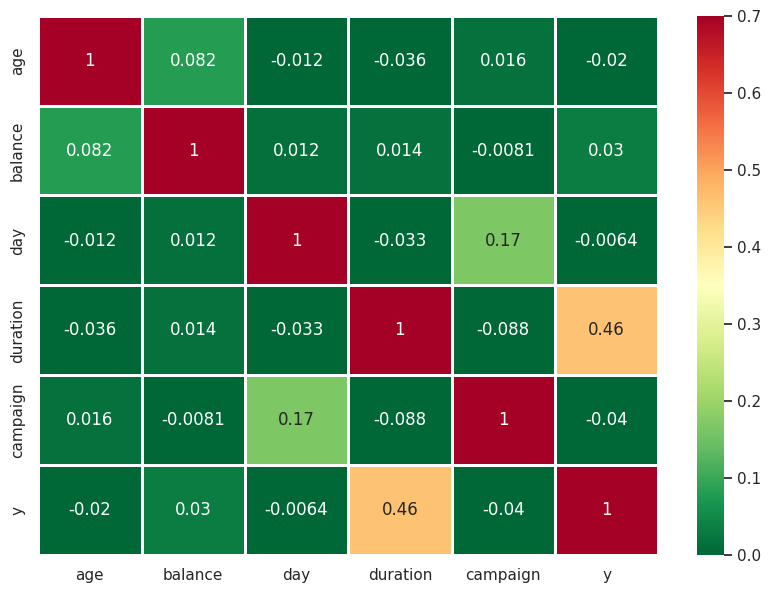

In [ ]:
corr= df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr,annot= True,vmin=0,vmax=0.7, cmap='RdYlGn_r',linewidths=0.75)
plt.show()

Only, duration attained a good positive correlation value.

In [ ]:
# we will encode the columns which contains categorical information
categ_columns = ['job','marital','education','contact','month','default','loan','day','housing']

In [ ]:
#creating dummy variables
encoded_data = pd.get_dummies(df, columns=categ_columns, drop_first=True)
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 66 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  40000 non-null  int64
 1   balance              40000 non-null  int64
 2   duration             40000 non-null  int64
 3   campaign             40000 non-null  int64
 4   y                    40000 non-null  int64
 5   job_blue-collar      40000 non-null  uint8
 6   job_entrepreneur     40000 non-null  uint8
 7   job_housemaid        40000 non-null  uint8
 8   job_management       40000 non-null  uint8
 9   job_retired          40000 non-null  uint8
 10  job_self-employed    40000 non-null  uint8
 11  job_services         40000 non-null  uint8
 12  job_student          40000 non-null  uint8
 13  job_technician       40000 non-null  uint8
 14  job_unemployed       40000 non-null  uint8
 15  job_unknown          40000 non-null  uint8
 16  marital_married      4

In [ ]:
# splitiing the data for modeling
X1 = encoded_data.drop('y',axis=1)
y1 = encoded_data['y']

In [ ]:
# we must treat those columns which contains significant no of outliers
outliers = ['age','balance','duration','campaign']
# we will define a function to winsorize x columns
def winsorize_series(series, lower_percentile=1, upper_percentile=99):
    lower_bound = np.percentile(series, lower_percentile)
    upper_bound = np.percentile(series, upper_percentile)
    return np.clip(series, lower_bound, upper_bound)
# Applying Winsorization to each feature
for col in outliers:
  X1[col] = winsorize_series(X1[col])

In [ ]:
# We will verify whether there are still any outliers in the respective columns
for column in outliers:
    feature_data = X1[column]
    # Detect outliers using Z-score
    outliers_indices = detect_outliers_zscore(feature_data)
    if len(outliers_indices) > 0:
        print(f"Outliers detected in '{column}' at indices:", len(outliers_indices))
    else:
        print(f"No outliers detected in '{column}'.")

No outliers detected in 'age'.
No outliers detected in 'balance'.
No outliers detected in 'duration'.
No outliers detected in 'campaign'.


There are no outliers.

#### **Modeling**:

Because we have a significant imbalance, we will use a random oversampler for the minority class-1 and a random undersampler for the majority class-0.

In [ ]:
kf = KFold(n_splits=5,shuffle=True,random_state=42)
lr = LogisticRegression(max_iter=1000,solver='liblinear')
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2,stratify = y1, random_state=42)
# now we will resample the train set to overcome heavy imbalance problem
# In order to avoid data leak we are resampling only on train set
# Original class distribution
target_counts = {'no': 37104, 'yes': 2896}
# Desired class distribution after resampling
desired_counts = {'no': 19000, 'yes': 5900}
samples_to_generate_yes = desired_counts['yes'] - target_counts['yes']
# Calculate the optimal number of samples to remove from 'no' class
samples_to_remove = target_counts['no'] - desired_counts['no']
# first we will reduce the majority class by 19000 observations
rus = RandomUnderSampler(sampling_strategy={0: samples_to_remove})
X_train_re1,y_train_re1 = rus.fit_resample(X_train, y_train)
# Oversample the minority class ('yes')
# we will increase the minority class by optimal amount so that it wont score less precision
ros = RandomOverSampler(sampling_strategy={1: samples_to_generate_yes})
X_train_re, y_train_re = ros.fit_resample(X_train_re1, y_train_re1)
cross_val_scores = cross_val_score(lr, X_train_re, y_train_re, cv=kf, scoring='roc_auc')
print("Cross-validation scores:", cross_val_scores)
# Calculate the mean and standard deviation of cross-validation scores
mean_cv_score = cross_val_scores.mean()
std_cv_score = cross_val_scores.std()
print("Mean Cross-validation Score:", mean_cv_score)
print("Standard Deviation of Cross-validation Scores:", std_cv_score)

Cross-validation scores: [0.92850794 0.93220932 0.9270022  0.93021759 0.92948502]
Mean Cross-validation Score: 0.92948441422106
Standard Deviation of Cross-validation Scores: 0.0017365245832072008


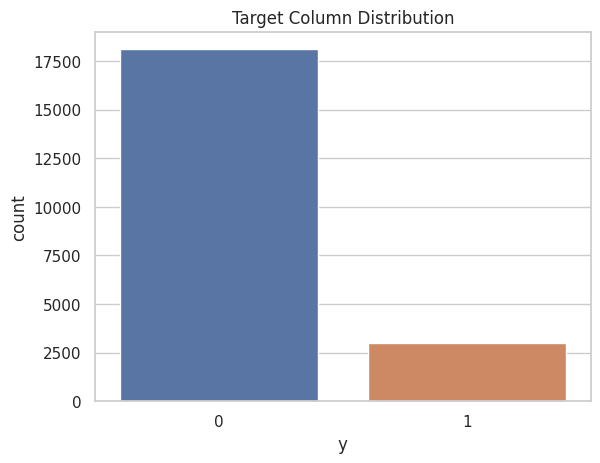

0    18104
1     3004
Name: y, dtype: int64


In [ ]:
#we will verify whether the training set is resampled or not
target_count= y_train_re.value_counts()
#target class distribution
sns.countplot(x=y_train_re, data=X_train_re)
plt.title('Target Column Distribution')
plt.show()
print(target_count)

In [ ]:
#fitting
lr.fit(X_train_re, y_train_re)
# Making predictions on the  test set
y_pred = lr.predict(X_test)
# Evaluating the model's performance on the test set
accuracy_test = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy_test)

Test Set Accuracy: 0.9295


Given the significant class imbalance, it's important to prioritize the precision and recall metrics over accuracy score.

Test Set Report:
----------------------------------------------------------------------------------------------------


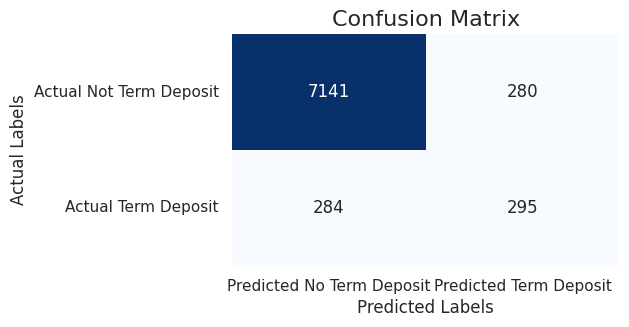

Recall: 0.51
Precision: 0.51
F1 Score: 0.51


In [ ]:
cm = confusion_matrix(y_test, y_pred)
# Calculate recall, precision, and F1 score
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual Not Term Deposit', 'Actual Term Deposit'], columns=['Predicted No Term Deposit', 'Predicted Term Deposit'])
print("Test Set Report:")
print("-"*100)
# we will plot the confusion matrix heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix', fontsize=16)
plt.show()

print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

In [ ]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      7421
           1       0.51      0.51      0.51       579

    accuracy                           0.93      8000
   macro avg       0.74      0.74      0.74      8000
weighted avg       0.93      0.93      0.93      8000



We can observe avg precision score and avg recall score on entire test set is 74.

ROC-AUC Score: 0.9288824437209534


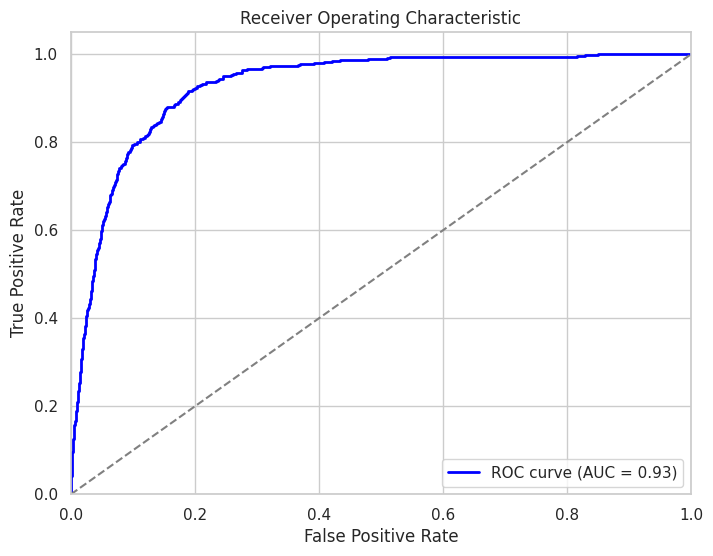

In [ ]:
y_prob = lr.predict_proba(X_test)[:, 1]
# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

We will proceed with the training of the random forest model using carefully optimized hyperparameter values.

In [ ]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='roc_auc', cv=5)
# Fit the grid search to your data
grid_search.fit(X_train_re, y_train_re)
# Print the best parameters and best ROC-AUC score
print("Best Parameters:", grid_search.best_params_)
print("Best ROC-AUC Score:", grid_search.best_score_)

Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best ROC-AUC Score: 0.9645180480782118


In [ ]:
best_rf =  RandomForestClassifier(bootstrap= False, max_depth= None, min_samples_leaf= 2, min_samples_split= 2, n_estimators= 300)
# Fit the model on the training data
best_rf.fit(X_train_re, y_train_re)

RandomForestClassifier(bootstrap=False, min_samples_leaf=2, n_estimators=300)

In [ ]:
# Predict on the test set
y_pred2 = best_rf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_ = accuracy_score(y_test,y_pred2)
# Calculate ROC-AUC score on the test set
roc_auc = roc_auc_score(y_test, y_pred2)
print("Test ROC-AUC Score:", roc_auc)
print("Test Accuracy Score:",accuracy_)

Test ROC-AUC Score: 0.728473717050456
Test Accuracy Score: 0.932


Test Set Report:
----------------------------------------------------------------------------------------------------


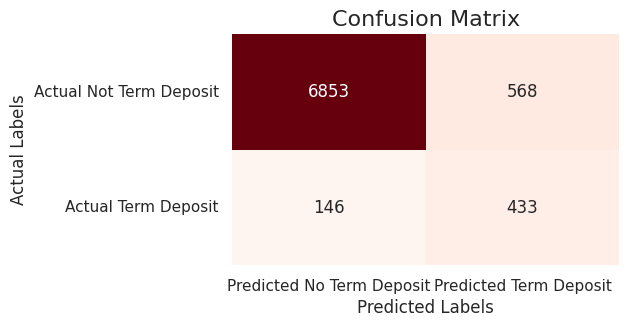

Recall: 0.75
Precision: 0.43
F1 Score: 0.55


In [ ]:
cm2 = confusion_matrix(y_test, y_pred2)
# Calculate recall, precision, and F1 score
recall2 = recall_score(y_test, y_pred2)
precision2 = precision_score(y_test, y_pred2)
f1_2 = f1_score(y_test, y_pred2)
cm_df2 = pd.DataFrame(cm2, index=['Actual Not Term Deposit', 'Actual Term Deposit'], columns=['Predicted No Term Deposit', 'Predicted Term Deposit'])
print("Test Set Report:")
print("-"*100)
# we will plot the confusion matrix heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm_df2, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix', fontsize=16)
plt.show()
print("Recall: {:.2f}".format(recall2))
print("Precision: {:.2f}".format(precision2))
print("F1 Score: {:.2f}".format(f1_2))

We can observe that random forest model attained a good recall score, but the precision score is low compared to previous model.

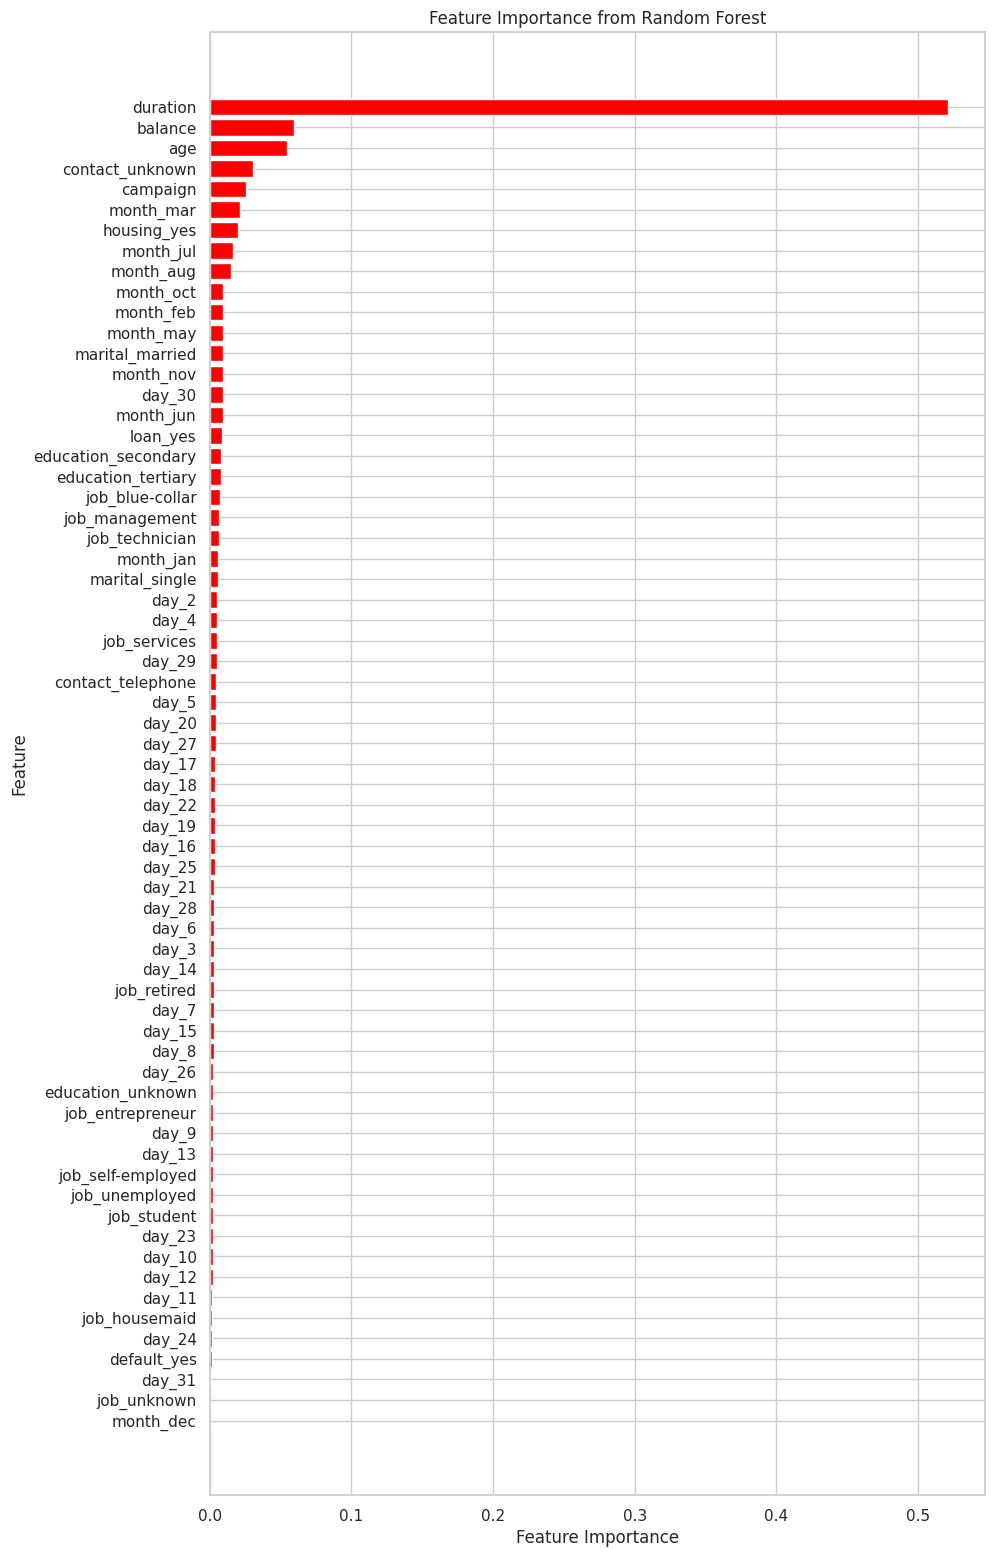

In [ ]:
feature_importances3 = best_rf.feature_importances_
# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X1.columns, 'Importance': feature_importances3})
importance_df = importance_df.sort_values(by='Importance', ascending=True)
# Plotting the feature importances
plt.figure(figsize=(10, 19))
plt.barh(importance_df['Feature'], importance_df['Importance'],color='red')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.show()

We can notice that duration is the top important feature. Next, we will proceed to confirm the feature importance through SHAP analysis.

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 8.8 MB/s eta 0:00:00


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


  0%|          | 0/35 [00:00<?, ?it/s]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


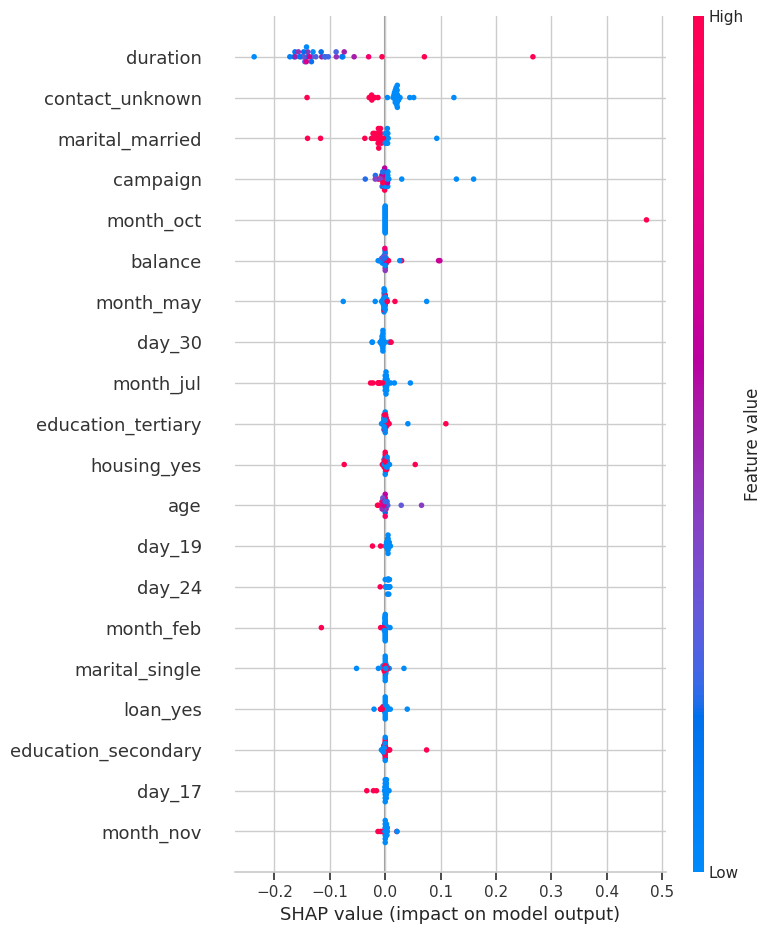

In [ ]:
import shap
shap_sample_train = shap.sample(X_train_re, 110)
shap_sample_test = shap.sample(X_test, 35)
explainer = shap.KernelExplainer(best_rf.predict, shap_sample_train)
shap_values_test = explainer.shap_values(shap_sample_test)
shap.summary_plot(shap_values_test,shap_sample_test)

From the above shap analysis, we can conclude that the features - duration,contact method, and marital status are top important features.


Next, we will proceed to apply the Adaboost classifier in an effort to achieve improved outcomes.

In [ ]:

base_estimator = DecisionTreeClassifier(max_depth=3)
# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of estimators
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
}
# Initialize the AdaBoost classifier
adaboost = AdaBoostClassifier(base_estimator=base_estimator)
# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(adaboost, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
# Fit the model with the training data
grid_search.fit(X_train_re, y_train_re)
# Get the best parameters and the corresponding model
best_params2 = grid_search.best_params_
best_model2 = grid_search.best_estimator_
print("Best Parameters:", best_params2)

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.


Best Parameters: {'learning_rate': 0.1, 'n_estimators': 200}


In [ ]:
# Predicting on the test set
y_pred3 = best_model2.predict(X_test)
# Calculating ROC-AUC score on the test set
roc_auc3 = roc_auc_score(y_test, y_pred3)
accuracy3 = accuracy_score(y_test, y_pred3)
# Print the results
print("Accuracy Score:",accuracy3)
print("ROC-AUC Score:", roc_auc3)

Accuracy Score: 0.929
ROC-AUC Score: 0.7770161184278662


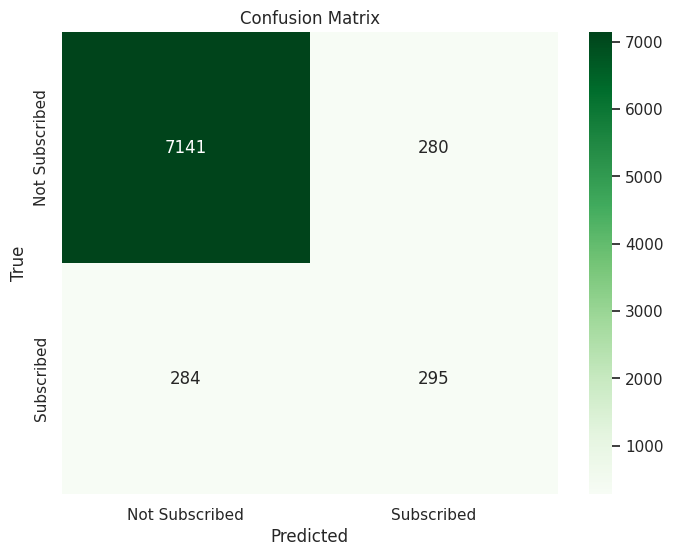

Precision: 0.5080527086383602
Recall: 0.5993091537132987
F1 Score: 0.5499207606973058


In [ ]:
# we will Create a confusion matrix
cm3 = confusion_matrix(y_test, y_pred3)
# Defining class labels
class_labels = ['Not Subscribed', 'Subscribed']
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print("Precision:",precision_score(y_test, y_pred3))
print("Recall:",recall_score(y_test, y_pred3))
print("F1 Score:",f1_score(y_test, y_pred3))

In [ ]:
cr3 = classification_report(y_test,y_pred3)
print(cr3)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      7421
           1       0.51      0.60      0.55       579

    accuracy                           0.93      8000
   macro avg       0.74      0.78      0.76      8000
weighted avg       0.93      0.93      0.93      8000



The macro-avg for F1-score is 76%.

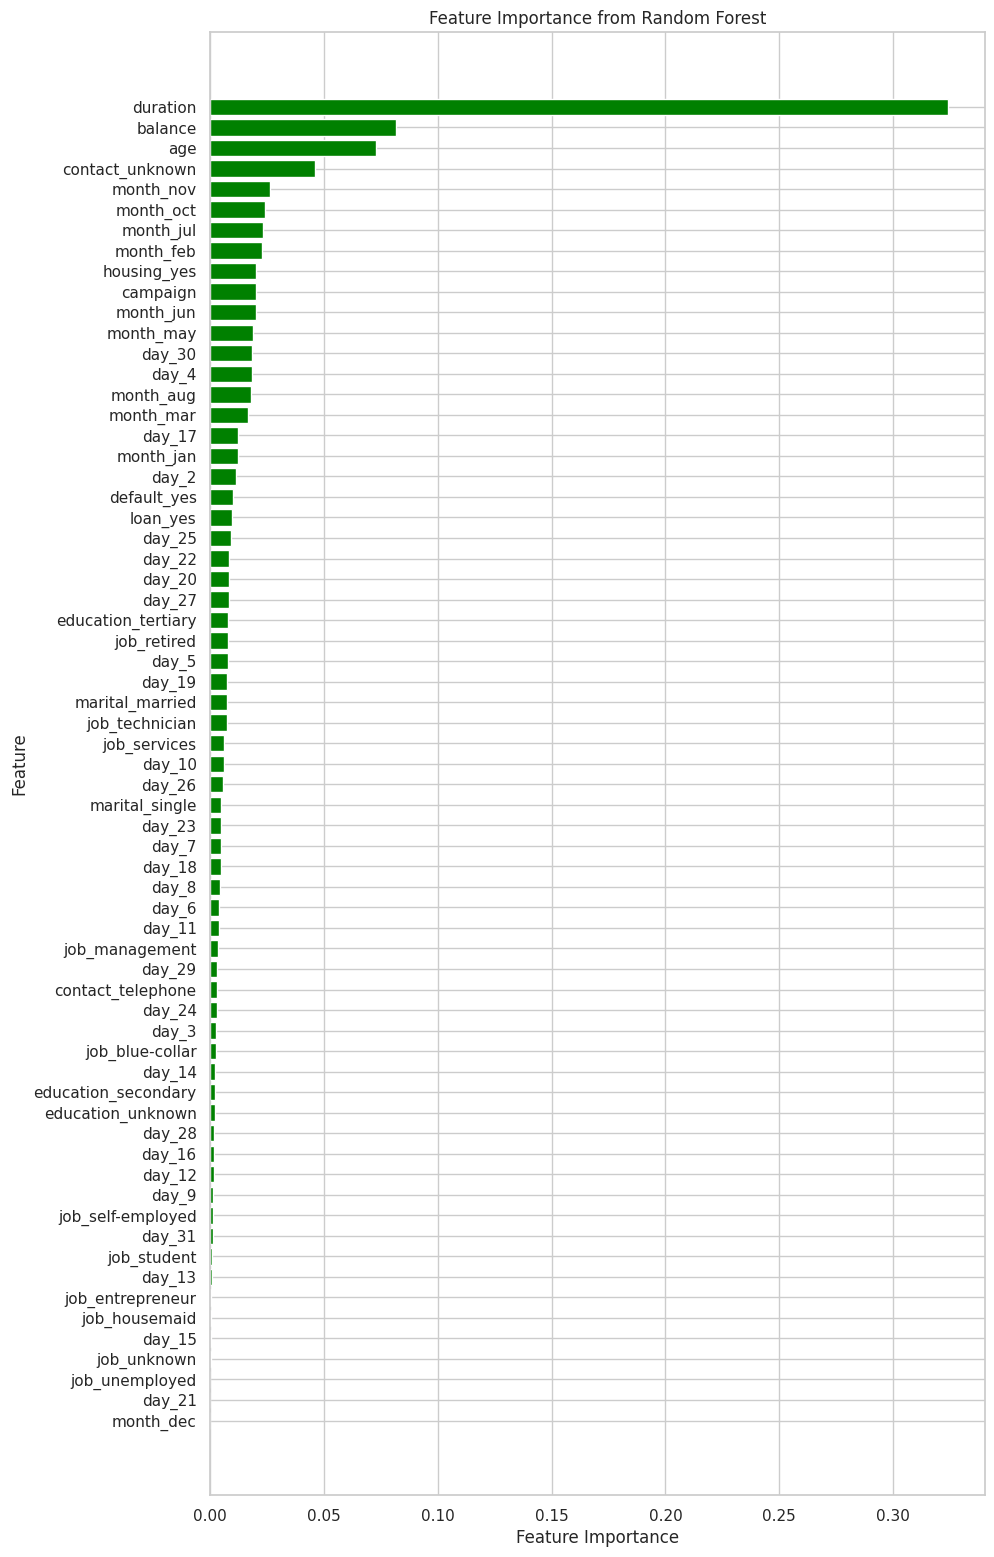

In [ ]:
feature_importances3 = best_model2.feature_importances_
# Creating a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X1.columns, 'Importance': feature_importances3})
importance_df = importance_df.sort_values(by='Importance', ascending=True)
# Plotting the feature importances
plt.figure(figsize=(10, 19))
plt.barh(importance_df['Feature'], importance_df['Importance'],color= 'green')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.show()


We can observe that both the Random Forest model and the Adaptive Boosting model have essentially identified and given significance to the almost same set of important features.

  0%|          | 0/35 [00:00<?, ?it/s]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


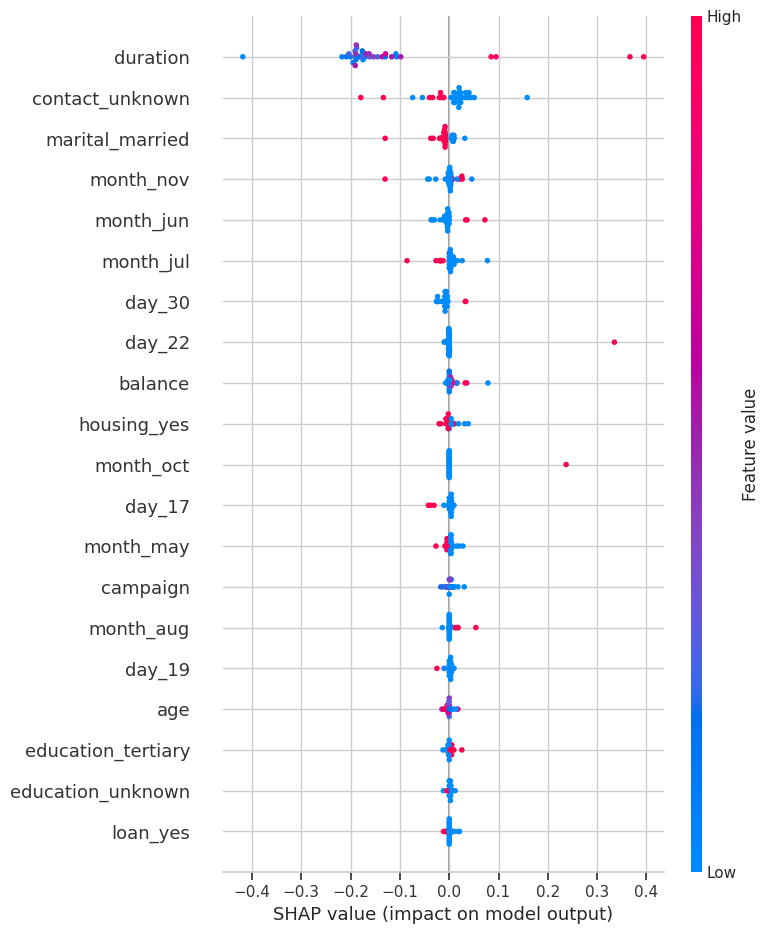

In [ ]:
# performing shap analysis on certain samples
shap_sample_train = shap.sample(X_train_re, 110)
shap_sample_test = shap.sample(X_test, 35)
explainer = shap.KernelExplainer(best_model2.predict, shap_sample_train)
shap_values_test = explainer.shap_values(shap_sample_test)
shap.summary_plot(shap_values_test,shap_sample_test)